In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../../data/bikes_by_hour.csv', 
                 index_col='instant')

In [3]:
df.head()

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
instant,,,,,,,,,,,,,,,,
1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [4]:
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt

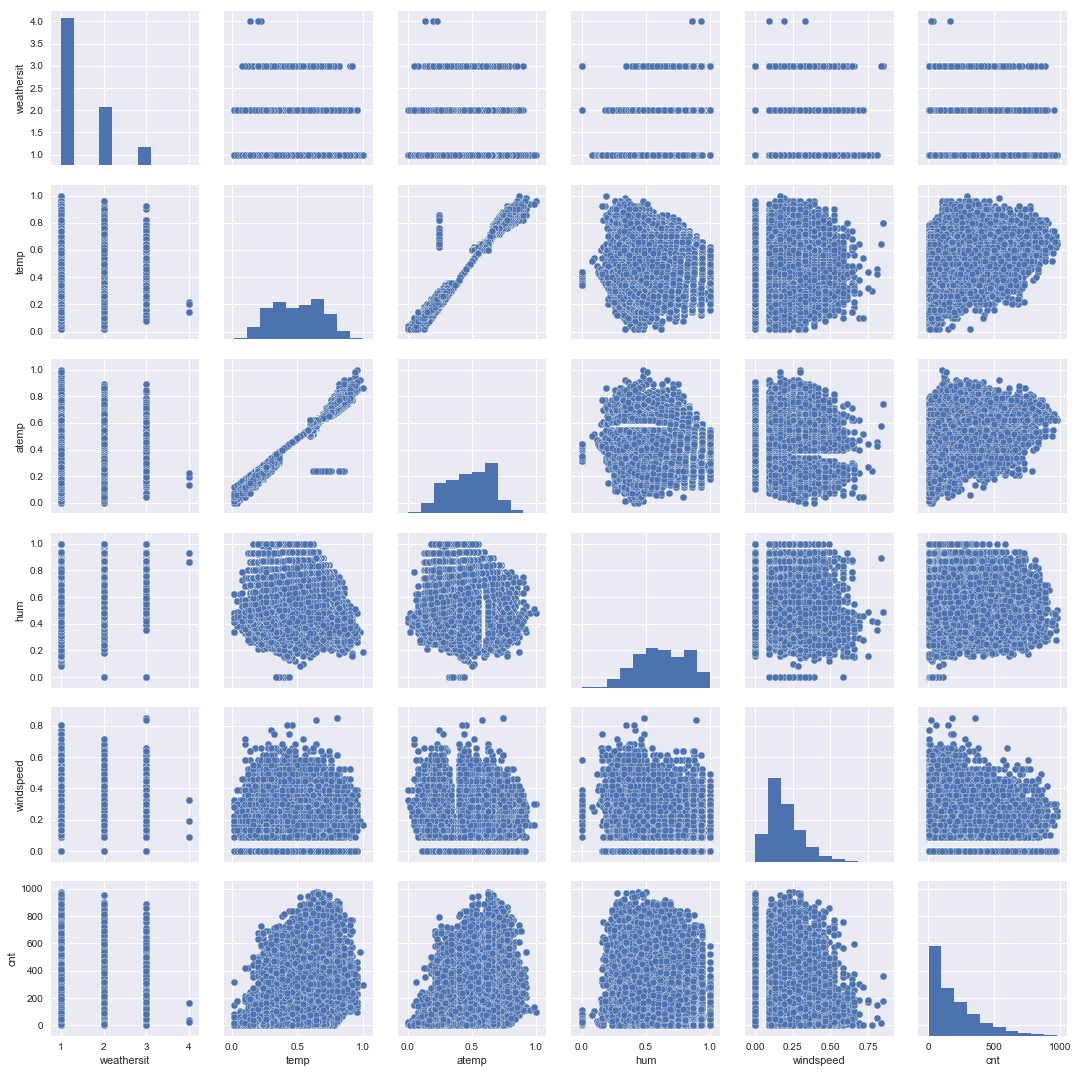

In [5]:
sns.pairplot(df[['weathersit','temp',
                 'atemp','hum','windspeed', 'cnt']]);

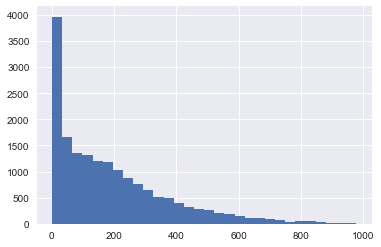

In [6]:
df['cnt'].hist(bins=30);

In [7]:
X, y = df.drop(['casual', 'registered', 'cnt', 'dteday'],
              axis=1), df['cnt']

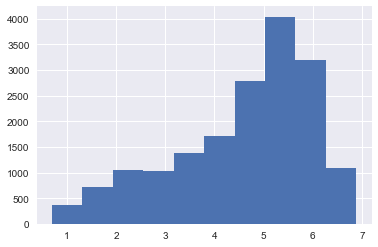

In [8]:
df['cnt'].apply(np.log1p).hist();

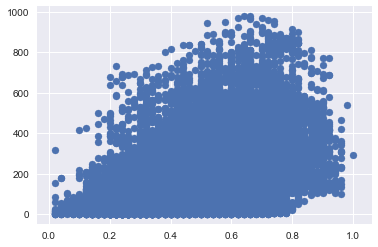

In [9]:
plt.scatter(X['temp'], y);

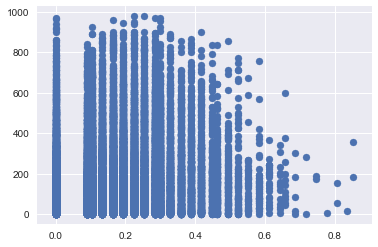

In [10]:
plt.scatter(X['windspeed'], y);

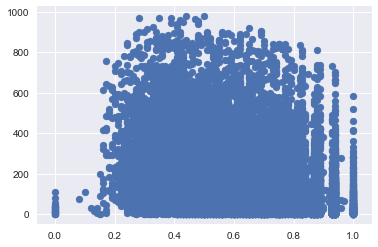

In [11]:
plt.scatter(X['hum'], y);

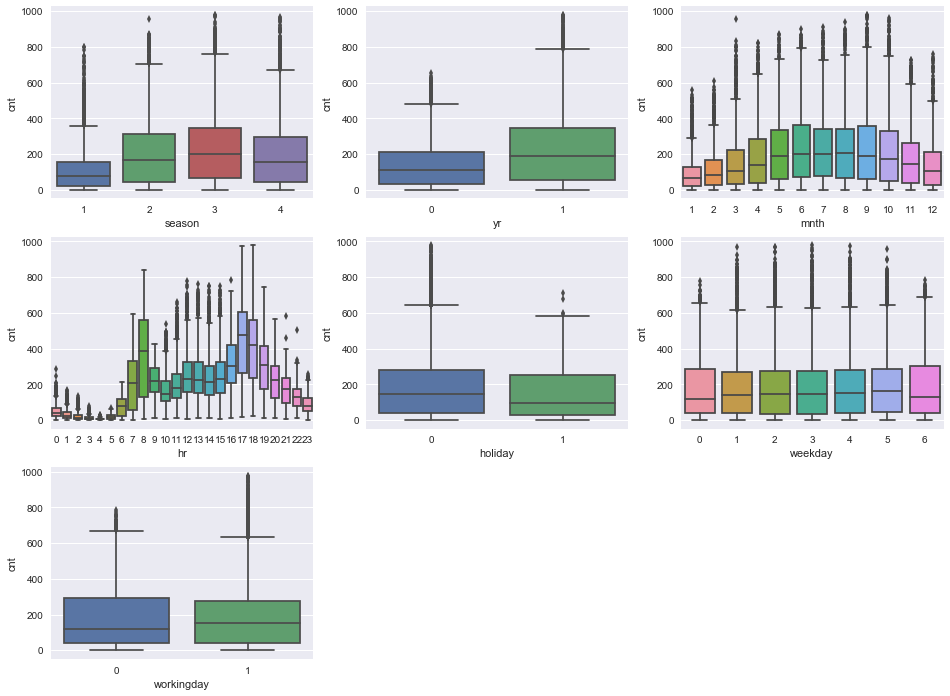

In [12]:
plt.rcParams['figure.figsize'] = (16,12)

for i, feat in enumerate(['season','yr','mnth','hr',
               'holiday','weekday','workingday']):
    
    plt.subplot(3,3, i + 1)
    sns.boxplot(x=X[feat], y=y);

In [13]:
X.corr()

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
season,1.000000,-0.010742,0.830386,-0.006117,-0.009585,-0.002335,0.013743,-0.014524,0.312025,0.319380,0.150625,-0.149773
yr,-0.010742,1.000000,-0.010473,-0.003867,0.006692,-0.004485,-0.002196,-0.019157,0.040913,0.039222,-0.083546,-0.008740
mnth,0.830386,-0.010473,1.000000,-0.005772,0.018430,0.010400,-0.003477,0.005400,0.201691,0.208096,0.164411,-0.135386
hr,-0.006117,-0.003867,-0.005772,1.000000,0.000479,-0.003498,0.002285,-0.020203,0.137603,0.133750,-0.276498,0.137252
holiday,-0.009585,0.006692,0.018430,0.000479,1.000000,-0.102088,-0.252471,-0.017036,-0.027340,-0.030973,-0.010588,0.003988
weekday,-0.002335,-0.004485,0.010400,-0.003498,-0.102088,1.000000,0.035955,0.003311,-0.001795,-0.008821,-0.037158,0.011502
workingday,0.013743,-0.002196,-0.003477,0.002285,-0.252471,0.035955,1.000000,0.044672,0.055390,0.054667,0.015688,-0.011830
weathersit,-0.014524,-0.019157,0.005400,-0.020203,-0.017036,0.003311,0.044672,1.000000,-0.102640,-0.105563,0.418130,0.026226
temp,0.312025,0.040913,0.201691,0.137603,-0.027340,-0.001795,0.055390,-0.102640,1.000000,0.987672,-0.069881,-0.023125
atemp,0.319380,0.039222,0.208096,0.133750,-0.030973,-0.008821,0.054667,-0.105563,0.987672,1.000000,-0.051918,-0.062336


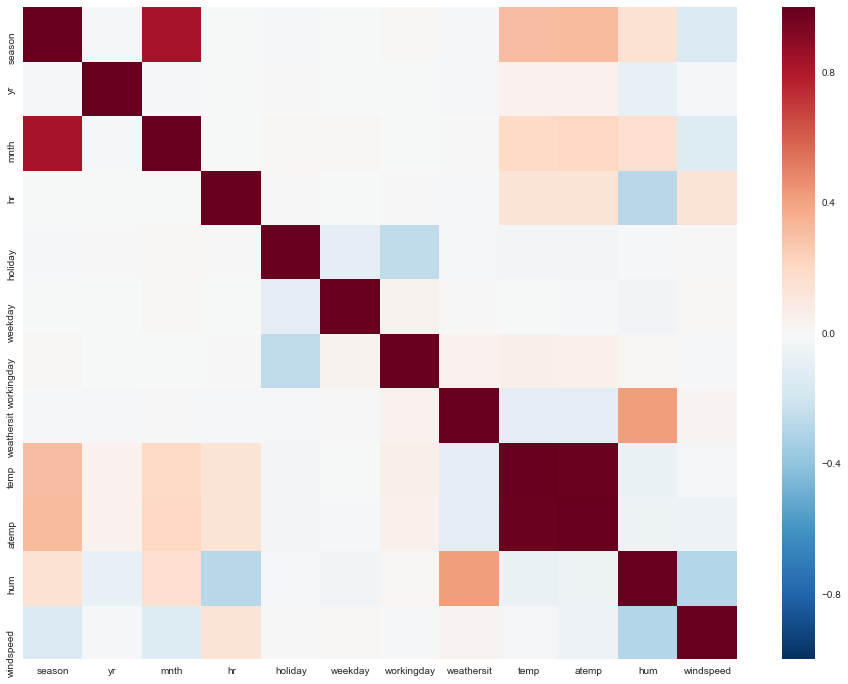

In [14]:
sns.heatmap(X.corr());

In [15]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.linear_model import  LassoCV, Ridge, RidgeCV

In [16]:
ols_model = LinearRegression()

In [17]:
pd.to_datetime(df['dteday']).head()

instant
1   2011-01-01
2   2011-01-01
3   2011-01-01
4   2011-01-01
5   2011-01-01
Name: dteday, dtype: datetime64[ns]

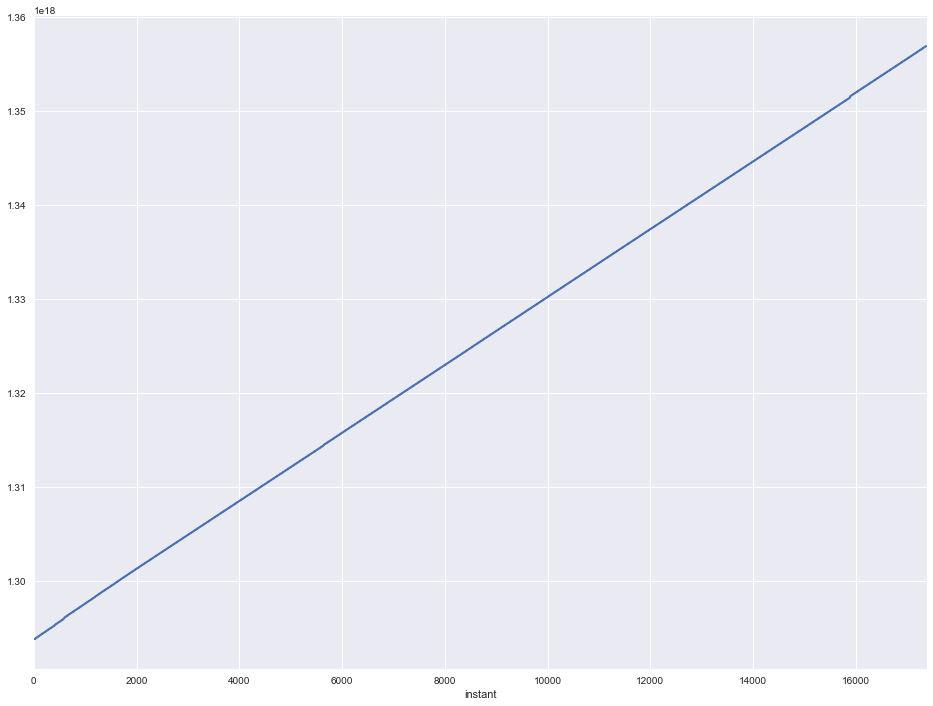

In [18]:
df['dteday'].apply(lambda ts: pd.to_datetime(ts).value).plot();

In [19]:
train_size = int(0.7 * df.shape[0])

In [20]:
X_train, X_valid = X.values[:train_size, : ], X.values[train_size:, :]
y_train, y_valid = y.values[:train_size], y.values[train_size:]

In [21]:
ols_model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [22]:
ols_valid_pred = ols_model.predict(X_valid)

In [23]:
from sklearn.metrics import mean_squared_error

In [24]:
np.sqrt(mean_squared_error(y_valid, ols_valid_pred))

184.58512708591141

In [25]:
y.min(), y.max()

(1, 977)

In [26]:
ols_model.coef_

array([  12.83530169,   86.58881085,    1.64494833,    6.55819547,
        -22.16157875,    1.57353568,   -0.63809235,   -6.70111343,
         50.75172707,  258.38149703, -151.47165911,   20.63723044])

In [27]:
pd.DataFrame({'feat': X.columns, 'coef': ols_model.coef_})

,coef,feat
0,12.835302,season
1,86.588811,yr
2,1.644948,mnth
3,6.558195,hr
4,-22.161579,holiday
5,1.573536,weekday
6,-0.638092,workingday
7,-6.701113,weathersit
8,50.751727,temp
9,258.381497,atemp


In [28]:
lasso_model = Lasso()

In [29]:
lasso_model.fit(X_train, y_train)

Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [30]:
lasso_valid_pred = lasso_model.predict(X_valid)

In [31]:
np.sqrt(mean_squared_error(y_valid, lasso_valid_pred))

185.94166952706692

In [32]:
pd.DataFrame({'feat': X.columns, 
              'coef': lasso_model.coef_}).sort_values('coef', 
                                                      ascending=False)

,coef,feat
8,251.283699,temp
1,81.377272,yr
0,11.655459,season
3,6.898368,hr
2,1.754923,mnth
5,1.564279,weekday
4,-0.000000,holiday
6,0.000000,workingday
9,0.000000,atemp
11,0.000000,windspeed


In [33]:
lasso_grid = LassoCV(n_alphas=3000).fit(X_train, y_train)

In [34]:
lasso_tuned_valid_pred = lasso_grid.predict(X_valid)

In [35]:
np.sqrt(mean_squared_error(y_valid, lasso_tuned_valid_pred))

187.99778300650135

In [36]:
lasso_grid.alpha_

2.1585615679835581

In [37]:
lasso_grid.alphas_

array([  4.18723204e+02,   4.17759846e+02,   4.16798705e+02, ...,
         4.20656588e-01,   4.19688782e-01,   4.18723204e-01])

In [38]:
ridge_grid = RidgeCV(alphas=np.logspace(-2, 2, 3000)).fit(X_train, y_train)

In [39]:
ridge_tuned_valid_pred = ridge_grid.predict(X_valid)

In [40]:
np.sqrt(mean_squared_error(y_valid, ridge_tuned_valid_pred))

184.58951150528617

In [41]:
pd.DataFrame({'feat': X.columns, 
              'coef': ridge_grid.coef_}).sort_values('coef', 
                                                      ascending=False)

,coef,feat
9,232.517386,atemp
1,86.680915,yr
8,73.630291,temp
11,19.229085,windspeed
0,12.811808,season
3,6.563439,hr
2,1.658741,mnth
5,1.573055,weekday
6,-0.607710,workingday
7,-6.773951,weathersit


In [64]:
from sklearn.ensemble import RandomForestRegressor

In [65]:
forest = RandomForestRegressor(n_estimators=300, 
                               n_jobs=-1, random_state=17)

In [66]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_split=1e-07, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           n_estimators=300, n_jobs=-1, oob_score=False, random_state=17,
           verbose=0, warm_start=False)

In [67]:
forest_valid_pred = forest.predict(X_valid)

In [68]:
np.sqrt(mean_squared_error(y_valid, 
                           forest_valid_pred))

74.835743684550479

In [69]:
pd.DataFrame({'feat': X.columns, 
              'coef': forest.feature_importances_}).sort_values('coef', 
                                                      ascending=False)

,coef,feat
3,0.603587,hr
9,0.092600,atemp
8,0.068647,temp
6,0.060713,workingday
1,0.055655,yr
10,0.030415,hum
7,0.023161,weathersit
0,0.017493,season
2,0.017291,mnth
5,0.014089,weekday
